In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

c:\Users\Sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
rating = pd.read_csv("../ratings_Electronics.csv", names=['userId', 'productId', 'rating', 'timestamp'])
rating

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200
...,...,...,...,...
4996,ASJN4DBPLF53L,9575871979,5,1327795200
4997,A3FHN3MMR22VX2,9575871979,1,1314144000
4998,AFRLL15I6SGO0,9575871979,5,1373068800
4999,A1TYKVIT4FTMRO,9575871979,5,1219017600


<Axes: xlabel='rating'>

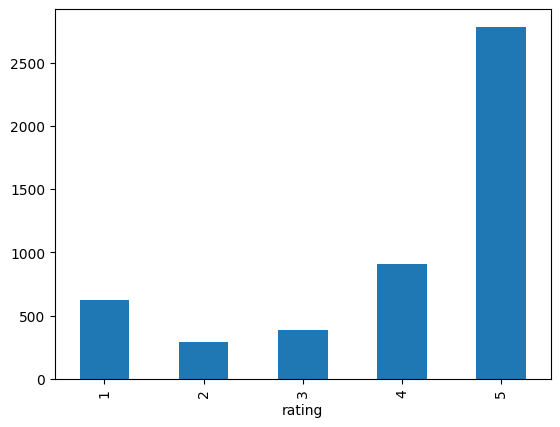

In [4]:
rating.rating.value_counts().sort_index().plot.bar()

In [5]:
user_matrix = rating.pivot(index='userId', columns='productId', values='rating').fillna(0)
user_matrix.head()

productId,059400232X,089933623X,094339676X,1034385789,1039869017,1085901386,1094441252,1182702627,1254875778,132793040,...,9574423271,9575871979,970407998,970408005,972683275,977703037,978770382,979526191,983947600,986987662
userId,,,,,,,,,,,,,,,,,,,,,
A00766851QZZUBOVF4JFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0293130VTX2ZXA70JQS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
A030530627MK66BD8V4LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
A0590501PZ7HOWJKBGQ4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A076219533YHEV2LJO988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [7]:
model_knn.fit(user_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [8]:
df_products = rating[['productId']]
df_products

,productId
0,132793040
1,321732944
2,439886341
3,439886341
4,439886341
...,...
4996,9575871979
4997,9575871979
4998,9575871979
4999,9575871979


In [9]:
df_products.productId.dtype

dtype('O')

In [10]:
from scipy.sparse import csr_matrix
mat_users=csr_matrix(user_matrix.values)
mat_users

<4930x299 sparse matrix of type '<class 'numpy.float64'>'
	with 5001 stored elements in Compressed Sparse Row format>

c:\Users\Sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


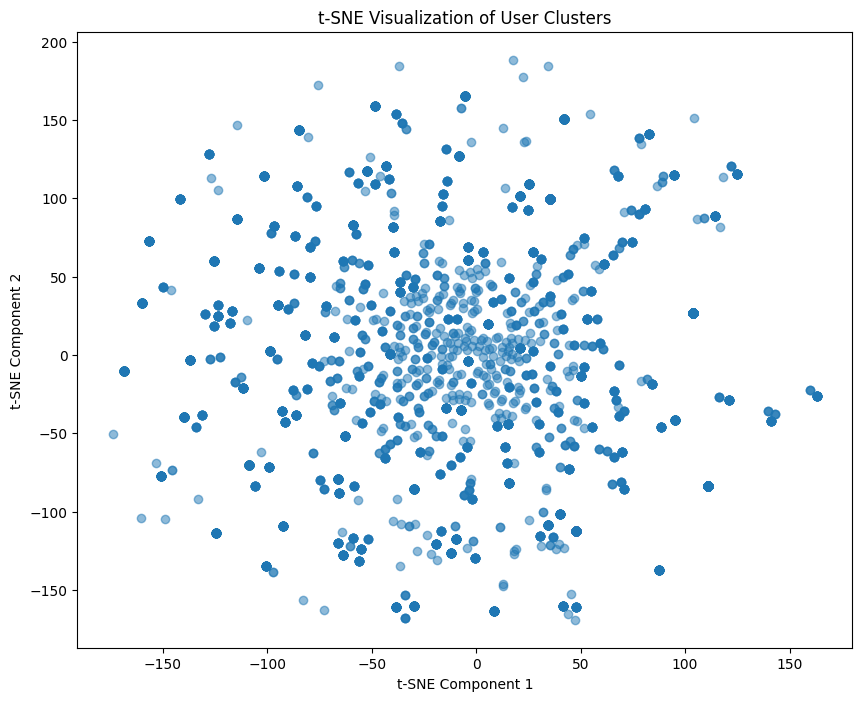

In [11]:
from sklearn.manifold import TSNE
distances, indices = model_knn.kneighbors(mat_users)

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42)
user_embeddings = tsne.fit_transform(user_matrix)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(user_embeddings[:, 0], user_embeddings[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of User Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [18]:
def title_to_index(title):
    print(df_products[df_products['productId']==title].index.values[0])
    return rating[rating['productId']==title].index.values[0]

def recommendation(product_name, df, model, num):
    index = title_to_index(product_name)
    distances, indices = model.kneighbors(df[index], n_neighbors=num)
    recc_index=indices[0].tolist()
    return rating['productId'].iloc[recc_index]




0


c:\Users\Sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


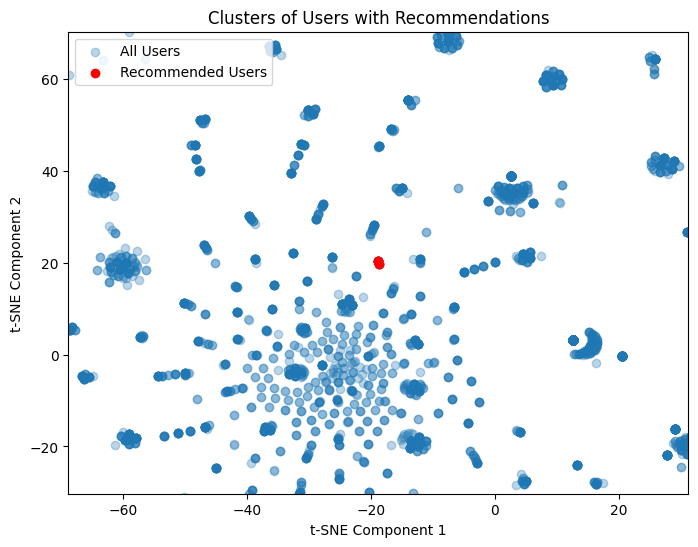

2886    140053271X
4439    8862935293
3458    1594243034
690      972683275
3919    6123015443
Name: productId, dtype: object

In [19]:
n_recommendations = 5
recommendation('132793040', mat_users, model_knn, n_recommendations)